## Neural Network

In [159]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import tensorflow as tf 
from tensorflow import keras 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline 

### Read Data

In [160]:
df = pd.read_csv('../../../../datasets/parte1/dataset_cleaned.csv')

#### X and y arrays

In [161]:
X = df.drop(['RainTomorrow'], axis=1)
y = df[['RainTomorrow']]

### Normalization

In [162]:
scaler_X = MinMaxScaler(feature_range=(0, 1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0, 1)).fit(y)
X = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

#### Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [163]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2023)

### Build Model

In [164]:
def build_model(activation = 'relu', learning_rate = 0.001):
    model = Sequential()
    model.add(Dense(16, input_dim = X.shape[1], activation = activation))
    model.add(Dense(8, activation = activation))
    model.add(Dense(1, activation = 'sigmoid')) # output 

    #Compile the model 
    model.compile(
        loss = 'binary_crossentropy', # Rever este loss
        optimizer  = tf.optimizers.Adam(learning_rate),
        metrics = ['accuracy']) # 'f1score'
    return model 
    

In [165]:
model = build_model()
model.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_72 (Dense)            (None, 16)                368       
                                                                 
 dropout_12 (Dropout)        (None, 16)                0         
                                                                 
 dense_73 (Dense)            (None, 8)                 136       
                                                                 
 dropout_13 (Dropout)        (None, 8)                 0         
                                                                 
 dense_74 (Dense)            (None, 1)                 9         
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


#### Training 

Using GridSearchCV to find the best hyperparameters

In [166]:

param_grid = {
    'optimizer': ['SGD', 'RMSprop', 'Adagrad'] 
} 

In [167]:
kf = KFold(n_splits = 10, shuffle= True, random_state=2023)

In [168]:
model = KerasClassifier(model=build_model, batch_size=32, validation_split=0.2, epochs = 20)

In [169]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=kf, scoring='accuracy', refit=True, verbose=2, n_jobs=-1)

#### Fit Model

In [170]:
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


Epoch 1/20
1092/1092 [==============================] - 2s 1ms/step - loss: 0.5017 - accuracy: 0.7592 - val_loss: 0.4771 - val_accuracy: 0.7727
Epoch 2/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.4721 - accuracy: 0.7788 - val_loss: 0.4469 - val_accuracy: 0.7903
Epoch 3/20
1092/1092 [==============================] - 2s 1ms/step - loss: 0.4641 - accuracy: 0.7844 - val_loss: 0.4495 - val_accuracy: 0.7869
Epoch 4/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.4635 - accuracy: 0.7844 - val_loss: 0.4669 - val_accuracy: 0.7775
Epoch 5/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.4622 - accuracy: 0.7846 - val_loss: 0.4437 - val_accuracy: 0.7942
Epoch 6/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.4615 - accuracy: 0.7834 - val_loss: 0.4411 - val_accuracy: 0.7928
Epoch 7/20
1092/1092 [==============================] - 1s 1ms/step - loss: 0.4601 - accuracy: 0.7853 - val_loss: 0.4395 - val_accuracy:

GridSearchCV(cv=KFold(n_splits=5, random_state=2023, shuffle=True),
             estimator=KerasClassifier(batch_size=32, epochs=20, model=<function build_model at 0x0000018E863FEB90>, validation_split=0.2),
             n_jobs=-1, param_grid={'optimizer': ['SGD', 'RMSprop', 'Adagrad']},
             scoring='accuracy', verbose=2)

In [171]:
#print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Inspect the best parameters

In [172]:
best_mlp_model = grid_search.best_estimator_
print(best_mlp_model)

KerasClassifier(
	model=<function build_model at 0x0000018E863FEB90>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)


#### Fit Model

In [173]:
best_mlp_model.fit(X_train, y_train, epochs = 20, validation_data = (X_test, y_test), verbose = 1)

Epoch 1/20
1366/1366 [==============================] - 3s 2ms/step - loss: 0.4891 - accuracy: 0.7677 - val_loss: 0.4722 - val_accuracy: 0.7802
Epoch 2/20
1366/1366 [==============================] - 2s 1ms/step - loss: 0.4673 - accuracy: 0.7807 - val_loss: 0.4471 - val_accuracy: 0.7886
Epoch 3/20
1366/1366 [==============================] - 2s 1ms/step - loss: 0.4647 - accuracy: 0.7843 - val_loss: 0.4528 - val_accuracy: 0.7872
Epoch 4/20
1366/1366 [==============================] - 2s 1ms/step - loss: 0.4624 - accuracy: 0.7825 - val_loss: 0.4433 - val_accuracy: 0.7902
Epoch 5/20
1366/1366 [==============================] - 2s 1ms/step - loss: 0.4597 - accuracy: 0.7866 - val_loss: 0.4464 - val_accuracy: 0.7861
Epoch 6/20
1366/1366 [==============================] - 2s 1ms/step - loss: 0.4598 - accuracy: 0.7852 - val_loss: 0.4529 - val_accuracy: 0.7940
Epoch 7/20
1366/1366 [==============================] - 2s 2ms/step - loss: 0.4571 - accuracy: 0.7867 - val_loss: 0.4441 - val_accuracy:

KerasClassifier(
	model=<function build_model at 0x0000018E863FEB90>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=Adagrad
	loss=None
	metrics=None
	batch_size=32
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.2
	shuffle=True
	run_eagerly=False
	epochs=20
	class_weight=None
)

#### Learning Curves

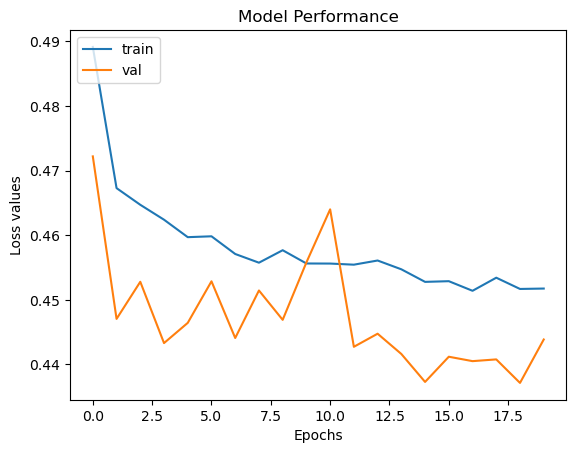

In [174]:
plt.plot(best_mlp_model.history_['loss'])
plt.plot(best_mlp_model.history_['val_loss'])
plt.title('Model Performance')
plt.ylabel('Loss values')
plt.xlabel('Epochs')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [175]:
predictions = best_mlp_model.predict(X_test)

586/586 [==============================] - 0s 744us/step


#### Classification Report

In [176]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.78      0.82      0.80      9311
         1.0       0.81      0.77      0.79      9410

    accuracy                           0.79     18721
   macro avg       0.79      0.79      0.79     18721
weighted avg       0.79      0.79      0.79     18721



#### Confusion matrix

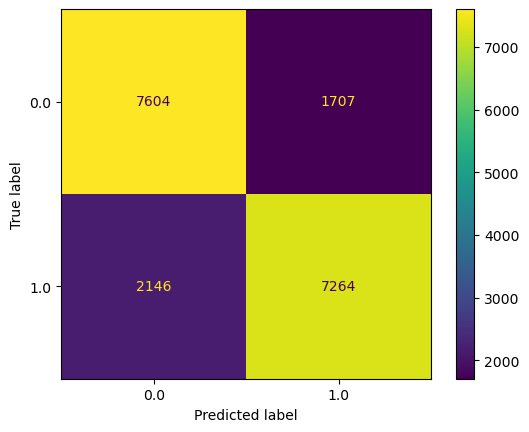

In [177]:
ConfusionMatrixDisplay.from_predictions(y_test, predictions)
plt.show()